In [285]:
%matplotlib inline
# this library is for loading data and manipulating it
import pandas as pd
# import models
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
# get a helper function for splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
# get a function for measuring test error
from sklearn.metrics import mean_absolute_error,mean_squared_error
# for manipulating arrays
import numpy as np
# for visualising data
import matplotlib.pyplot as plt
# for stock data
import yfinance as yf

In [286]:
data = yf.Ticker("0005.HK")
data = data.history(start="2017-01-01")
data = data.reset_index().dropna()
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-01-03 00:00:00+08:00,46.433122,47.104446,46.395827,46.992558,11331063,0.0,0.0
1,2017-01-04 00:00:00+08:00,47.328224,47.328224,46.955267,47.328224,13426502,0.0,0.0
2,2017-01-05 00:00:00+08:00,47.589294,47.701182,47.402816,47.663887,12484357,0.0,0.0
3,2017-01-06 00:00:00+08:00,47.663886,47.663886,47.253632,47.551998,14321890,0.0,0.0
4,2017-01-09 00:00:00+08:00,47.440113,47.626591,47.216339,47.514706,10499807,0.0,0.0
...,...,...,...,...,...,...,...,...
1690,2023-11-13 00:00:00+08:00,57.700001,57.900002,57.299999,57.750000,6965723,0.0,0.0
1691,2023-11-14 00:00:00+08:00,58.200001,58.799999,58.000000,58.349998,10246301,0.0,0.0
1692,2023-11-15 00:00:00+08:00,59.150002,60.150002,58.799999,59.900002,25082391,0.0,0.0
1693,2023-11-16 00:00:00+08:00,60.000000,60.000000,59.150002,59.400002,9045181,0.0,0.0


In [287]:
# add % features
num_days = 5
for i in range(1, num_days + 1):
    data[f"Day n - {i} Price Change %"] = (data["Close"].shift(i) - data["Close"]) * 100 / data["Close"]
    
#data["Ratio to MA10"] = data["Close"] / data["Close"].rolling(10).mean()
#data["Ratio to MA30"] = data["Close"] / data["Close"].rolling(30).mean()

data["Day n+5 Price"] = data["Close"].shift(-5)
data["Day n+5 Price Change %"] = (data["Day n+5 Price"] - data["Close"]) * 100 / data["Close"]
data = data.dropna().reset_index(drop=True)
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day n - 1 Price Change %,Day n - 2 Price Change %,Day n - 3 Price Change %,Day n - 4 Price Change %,Day n - 5 Price Change %,Day n+5 Price,Day n+5 Price Change %
0,2017-01-10 00:00:00+08:00,47.067149,47.365516,47.029854,47.253628,21843398,0.0,0.0,0.552503,0.631423,0.868207,0.157864,-0.552487,47.887661,1.341766
1,2017-01-11 00:00:00+08:00,47.179047,47.887663,47.179047,47.626595,21029702,0.0,0.0,-0.783106,-0.234929,-0.156628,0.078302,-0.626478,48.260620,1.331243
2,2017-01-12 00:00:00+08:00,47.738478,47.738478,47.440112,47.701183,13057005,0.0,0.0,-0.156367,-0.938248,-0.390929,-0.312749,-0.078187,48.447090,1.563707
3,2017-01-13 00:00:00+08:00,47.514706,47.813070,47.477411,47.738480,10043680,0.0,0.0,-0.078126,-0.234371,-1.015642,-0.468750,-0.390631,48.111435,0.781247
4,2017-01-16 00:00:00+08:00,47.514711,47.626596,47.067161,47.141754,12472145,0.0,0.0,1.265811,1.186696,1.028473,0.237313,0.791128,48.111435,2.056947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,2023-11-06 00:00:00+08:00,58.499487,58.699145,57.900518,58.449574,14725743,0.0,0.0,-0.597779,-2.647315,-2.818106,-4.099058,-2.305719,57.750000,-1.196884
1681,2023-11-07 00:00:00+08:00,58.749058,59.098460,58.499487,58.549404,9599836,0.0,0.0,-0.170507,-0.767267,-2.813308,-2.983808,-4.262575,58.349998,-0.340577
1682,2023-11-08 00:00:00+08:00,58.848887,58.998628,58.200001,58.200001,13438041,0.0,0.0,0.600349,0.428819,-0.171524,-2.229848,-2.401372,59.900002,2.920963
1683,2023-11-09 00:00:00+08:00,57.849998,57.849998,57.349998,57.500000,6722950,0.1,0.0,1.217393,1.825051,1.651432,1.043781,-1.039601,59.400002,3.304350


In [288]:
#X = data[['Close']+[i for i in data.columns if '%' in i][:-1]] 
X = data[[i for i in data.columns if '%' in i][:-1]] 
X

,Day n - 1 Price Change %,Day n - 2 Price Change %,Day n - 3 Price Change %,Day n - 4 Price Change %,Day n - 5 Price Change %
0,0.552503,0.631423,0.868207,0.157864,-0.552487
1,-0.783106,-0.234929,-0.156628,0.078302,-0.626478
2,-0.156367,-0.938248,-0.390929,-0.312749,-0.078187
3,-0.078126,-0.234371,-1.015642,-0.468750,-0.390631
4,1.265811,1.186696,1.028473,0.237313,0.791128
...,...,...,...,...,...
1680,-0.597779,-2.647315,-2.818106,-4.099058,-2.305719
1681,-0.170507,-0.767267,-2.813308,-2.983808,-4.262575
1682,0.600349,0.428819,-0.171524,-2.229848,-2.401372
1683,1.217393,1.825051,1.651432,1.043781,-1.039601


In [289]:
y = data['Day n+5 Price Change %']
y 

0       1.341766
1       1.331243
2       1.563707
3       0.781247
4       2.056947
          ...   
1680   -1.196884
1681   -0.340577
1682    2.920963
1683    3.304350
1684    3.054101
Name: Day n+5 Price Change %, Length: 1685, dtype: float64

In [299]:
# split the data into a training and test sets (50% training, 50% testing)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, shuffle=False)
# prepare a dictionary for storing test errors and predictions
model_data = dict()
# get real closing prices for the test set 
real_prices = data['Close'][len(y_train):].values 
# Create a table for backtest
test_result = pd.DataFrame({'Real Price':real_prices,'Real Price Change %':y_test})

In [300]:
test_result

,Real Price,Real Price Change %
0,43.004425,1.397854
1,43.189388,0.535337
2,43.929253,-0.947369
3,44.252937,-2.089858
4,43.466839,0.319152
...,...,...
501,58.449574,-1.196884
502,58.549404,-0.340577
503,58.200001,2.920963
504,57.500000,3.304350


Error of Random Forest regression model based on % change: 1.4839712749529852


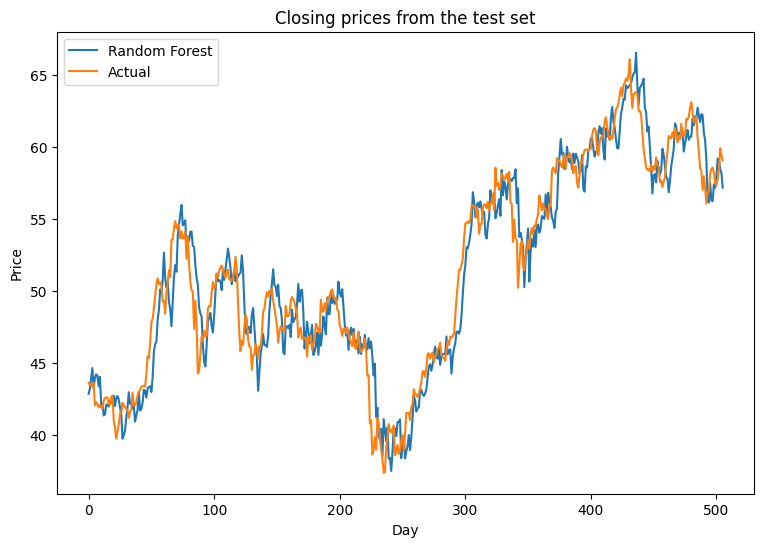

In [301]:
# initialise and train a random forest regression model 
model = RandomForestRegressor() 
model.fit(X_train, y_train) 
 
# use the model to make predictions on the test set 
y_pred = model.predict(X_test) 
 
# now let's generate closing price predictions based on the predicted changes 
predicted_next_prices = real_prices * (1 + y_pred / 100) 
real_next_prices = real_prices * (1 + y_test / 100) 

#  Insert data back to the frame
test_result['Random Forest Pred Price'] = predicted_next_prices
test_result['Random Forest Pred Price Change %'] = y_pred

# calculate MAE and store predictions for comparing all models' predictions on one graph 
model_name = "Random Forest" 
model_data[model_name] = { 
    "error": mean_absolute_error(predicted_next_prices, real_next_prices),  
    "predictions": predicted_next_prices 
} 
print("Error of " + model_name + " regression model based on % change:", model_data[model_name]["error"]) 
 
# plot the results 
plt.figure(figsize=(9,6)) 
plt.title("Closing prices from the test set") 
plt.plot(predicted_next_prices, label=model_name) 
plt.plot(real_next_prices, label="Actual") # same as multiplying y_test by closing prices 
plt.ylabel('Price') 
plt.xlabel('Day') 
plt.legend() 
plt.show() 

Error of kNN regression model based on % change: 1.5886869176579481


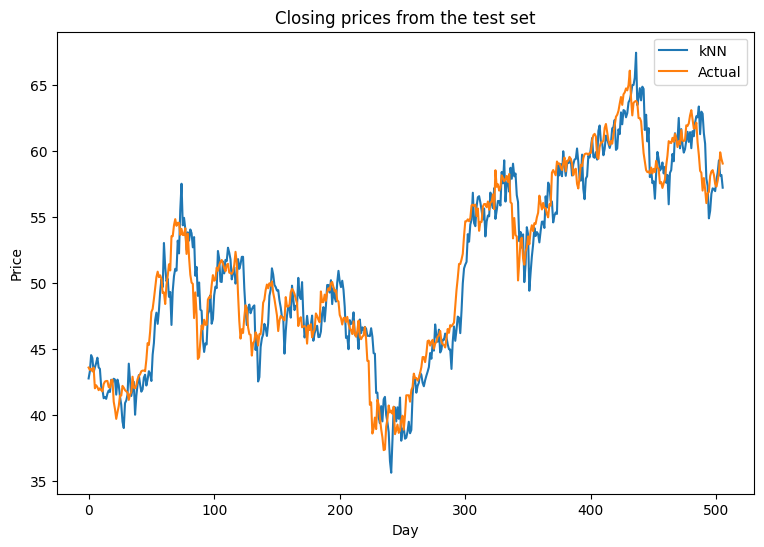

In [303]:
# initialise and train a kNN model 
model = KNeighborsRegressor() 
model.fit(X_train, y_train) 
 
# use the model to make predictions on the test set 
y_pred = model.predict(X_test) 

#  Insert data back to the frame
test_result['kNN Pred Price'] = predicted_next_prices
test_result['kNN Pred Price Change %'] = y_pred
 
# now let's generate closing price predictions based on the predicted changes 
predicted_next_prices = real_prices * (1 + y_pred / 100) 
real_next_prices = real_prices * (1 + y_test / 100) 
 
# calculate MAE and store predictions for comparing all models' predictions on one graph 
model_name = "kNN" 
model_data[model_name] = { 
    "error": mean_absolute_error(predicted_next_prices, real_next_prices),  
    "predictions": predicted_next_prices 
} 
print("Error of " + model_name + " regression model based on % change:", model_data[model_name]["error"]) 
 
# plot the results 
plt.figure(figsize=(9,6)) 
plt.title("Closing prices from the test set") 
plt.plot(predicted_next_prices, label=model_name) 
plt.plot(real_next_prices, label="Actual") # same as multiplying y_test by closing prices 
plt.ylabel('Price') 
plt.xlabel('Day') 
plt.legend() 
plt.show() 

Error of SVM regression model based on % change: 1.4378492985152478


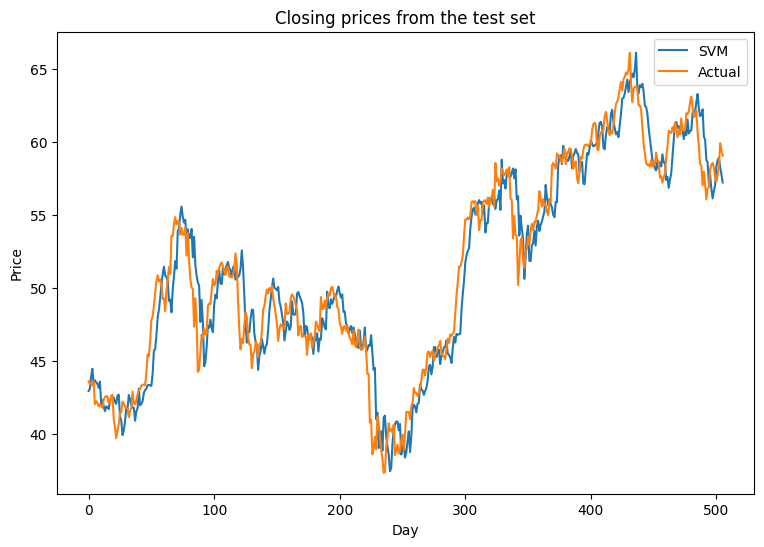

In [304]:
# initialise and train an SVR model 
model = SVR() 
model.fit(X_train, y_train) 
 
# use the model to make predictions on the test set 
y_pred = model.predict(X_test) 

#  Insert data back to the frame
test_result['SVR Pred Price'] = predicted_next_prices
test_result['SVR Pred Price Change %'] = y_pred
 
# now let's generate closing price predictions based on the predicted changes 
predicted_next_prices = real_prices * (1 + y_pred / 100) 
real_next_prices = real_prices * (1 + y_test / 100) 
 
# calculate MAE and store predictions for comparing all models' predictions on one graph 
model_name = "SVM" 
model_data[model_name] = { 
    "error": mean_absolute_error(predicted_next_prices, real_next_prices),  
    "predictions": predicted_next_prices 
} 
print("Error of " + model_name + " regression model based on % change:", model_data[model_name]["error"]) 
 
# plot the results 
plt.figure(figsize=(9,6)) 
plt.title("Closing prices from the test set") 
plt.plot(predicted_next_prices, label=model_name) 
plt.plot(real_next_prices, label="Actual") # same as multiplying y_test by closing prices 
plt.ylabel('Price') 
plt.xlabel('Day') 
plt.legend() 
plt.show() 

c:\Users\Tony Ho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Error of MLP regression model based on % change: 1.4539270362615464


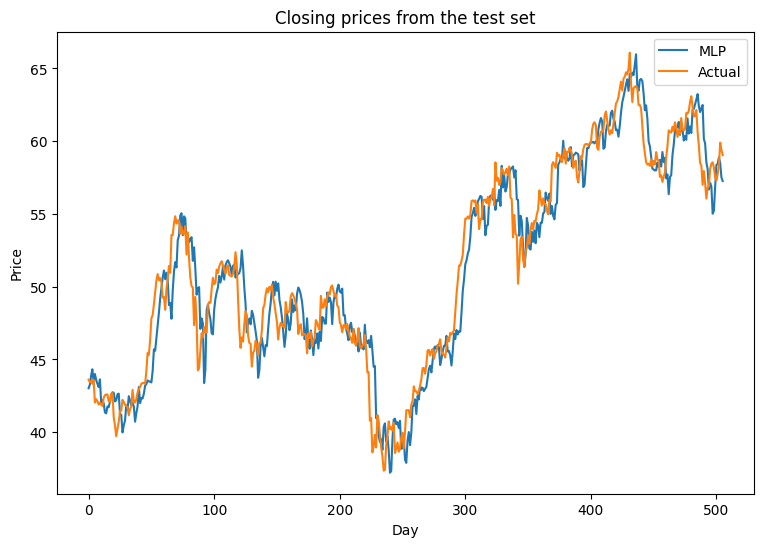

In [305]:
# initialise and train a neural network 
model = MLPRegressor(max_iter=400) 
model.fit(X_train, y_train) 
 
# use the model to make predictions on the test set 
y_pred = model.predict(X_test) 

#  Insert data back to the frame
test_result['MLP Pred Price'] = predicted_next_prices
test_result['MLP Pred Price Change %'] = y_pred
 
# now let's generate closing price predictions based on the predicted changes 
predicted_next_prices = real_prices * (1 + y_pred / 100) 
real_next_prices = real_prices * (1 + y_test / 100) 
 
# calculate MAE and store predictions for comparing all models' predictions on one graph 
model_name = "MLP" 
model_data[model_name] = { 
    "error": mean_absolute_error(predicted_next_prices, real_next_prices),  
    "predictions": predicted_next_prices 
} 
print("Error of " + model_name + " regression model based on % change:", model_data[model_name]["error"]) 
 
# plot the results 
plt.figure(figsize=(9,6)) 
plt.title("Closing prices from the test set") 
plt.plot(predicted_next_prices, label=model_name) 
plt.plot(real_next_prices, label="Actual") # same as multiplying y_test by closing prices 
plt.ylabel('Price') 
plt.xlabel('Day') 
plt.legend() 
plt.show() 

In [307]:
test_result

,Real Price,Real Price Change %,Random Forest Pred Price,Random Forest Pred Price Change %,kNN Pred Price,kNN Pred Price Change %,SVR Pred Price,SVR Pred Price Change %,MLP Pred Price,MLP Pred Price Change %
0,43.004425,1.397854,42.833243,-0.398057,42.833243,-0.521031,42.780359,-0.134089,42.946761,0.029182
1,43.189388,0.535337,43.168024,-0.049466,43.168024,0.309366,43.323002,-0.217446,43.095475,0.172475
2,43.929253,-0.947369,43.922321,-0.015778,43.922321,1.408972,44.548203,0.028775,43.941893,-0.109075
3,44.252937,-2.089858,44.630040,0.852153,44.630040,0.140974,44.315322,0.483008,44.466682,0.155978
4,43.466839,0.319152,43.246740,-0.506360,43.246740,-0.481715,43.257452,-0.123370,43.413214,-0.117328
...,...,...,...,...,...,...,...,...,...,...
501,58.449574,-1.196884,59.180027,1.249716,59.180027,-0.147680,58.363255,0.463383,58.720419,-0.029988
502,58.549404,-0.340577,59.143419,1.014554,59.143419,1.265249,59.290200,0.642897,58.925817,0.582226
503,58.200001,2.920963,58.432587,0.399632,58.432587,-0.118771,58.130876,0.038424,58.222364,0.508302
504,57.500000,3.304350,58.174656,1.173315,58.174656,1.189177,58.183777,0.462895,57.766164,0.009878


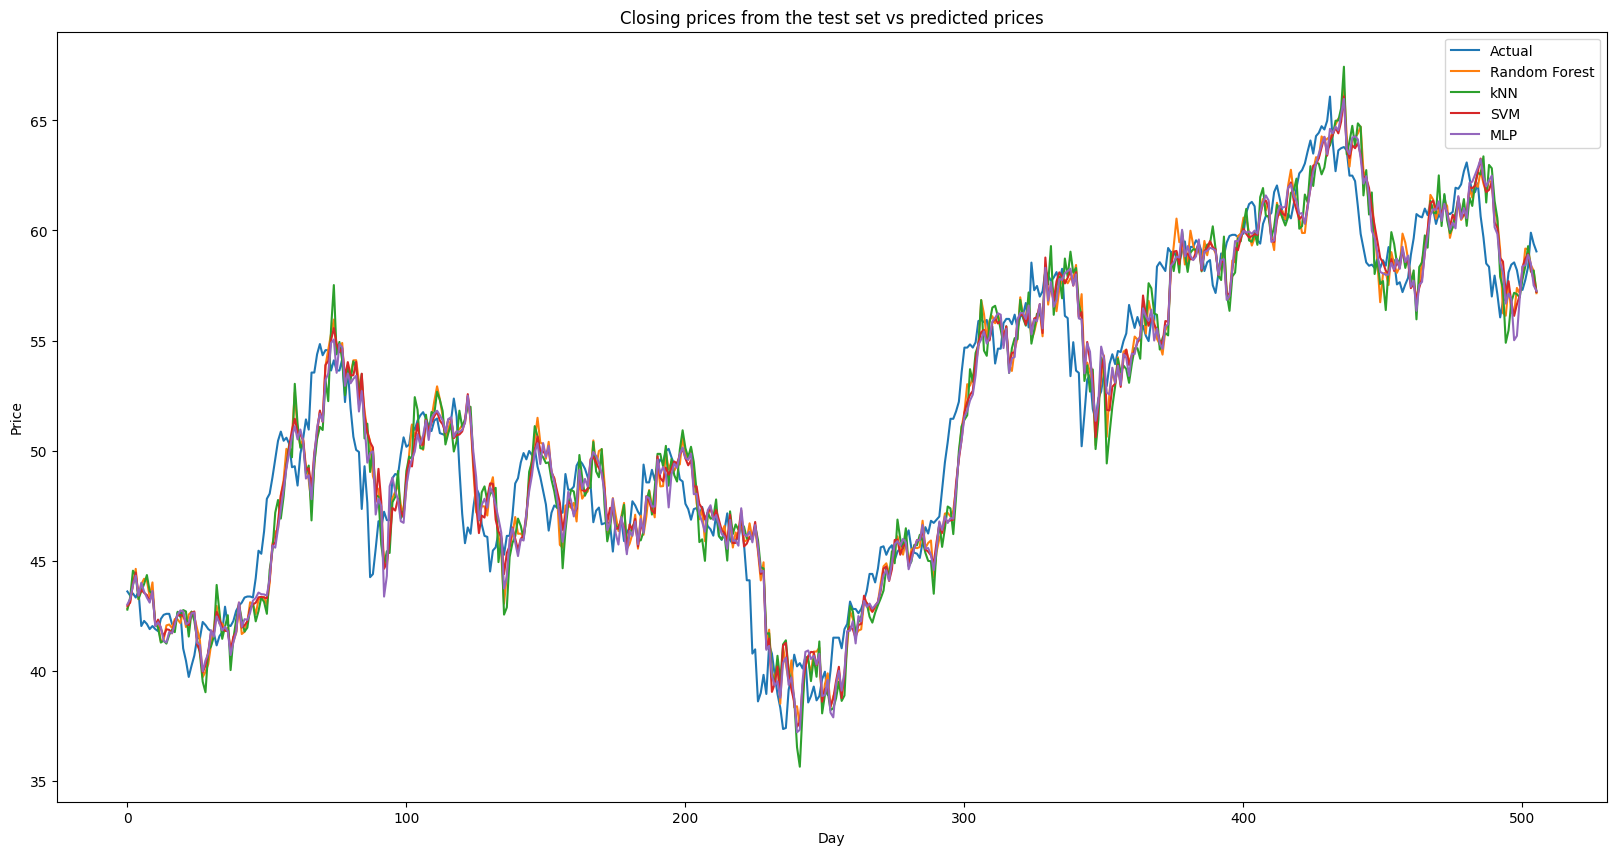

In [311]:
# now let's plot all models' predictions on one graph  
plt.figure(figsize=(20,10)) 
plt.title("Closing prices from the test set vs predicted prices") 
plt.ylabel('Price') 
plt.xlabel('Day') 
plt.plot(real_next_prices, label="Actual") 
 
for m in model_data: 
    plt.plot(model_data[m]["predictions"], label=m) 
 
plt.legend() 
plt.show()    

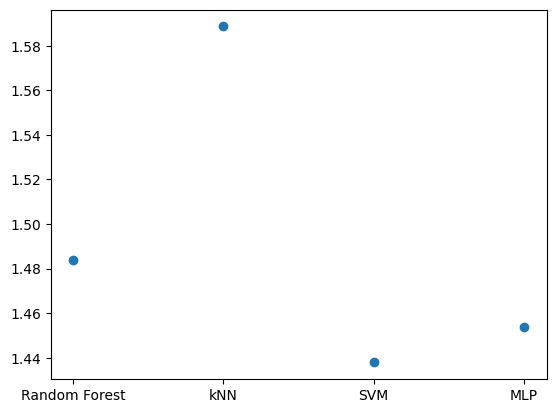

In [312]:
# let's plot the errors of different models using a scatter plot 
model_names = [m for m in model_data] 
model_errors = [model_data[m]["error"] for m in model_names] 
plt.scatter(model_names, model_errors) 
plt.show()  